# MBTI Project 

## Exploratory Data Analysis

### Imports
***

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.transforms
from matplotlib.patches import Patch
import seaborn as sns
import re
from scipy import stats

%matplotlib inline
sns.set(rc={'axes.facecolor':'white'})

In [15]:
df = pd.read_csv('../../../data/mbti_interim.csv', index_col=0)

<br>


### Let's start by checking the state of our dataset after data-wrangling
***

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
I,8675.0,0.769568,0.421134,0.0,1.00,1.000000,1.00,1.000000
J,8675.0,0.395850,0.489061,0.0,0.00,0.000000,1.00,1.000000
N,8675.0,0.862017,0.344902,0.0,1.00,1.000000,1.00,1.000000
T,8675.0,0.458905,0.498337,0.0,0.00,0.000000,1.00,1.000000
NF,8675.0,0.480346,0.499642,0.0,0.00,0.000000,1.00,1.000000
...,...,...,...,...,...,...,...,...
avg_third_person,8675.0,0.415968,0.252414,0.0,0.24,0.361702,0.54,3.120000
positive_words,8675.0,39.527608,13.471651,0.0,30.00,40.000000,49.00,111.000000
avg_positive_words,8675.0,0.810456,0.262999,0.0,0.64,0.800000,0.98,2.220000
negative_words,8675.0,27.081960,10.352061,0.0,20.00,27.000000,34.00,78.000000


In [17]:
df.head()

,type,posts,I,J,N,T,NF,NT,SP,SJ,...,them_count,their_count,theirs_count,themselves_count,total_third_person,avg_third_person,positive_words,avg_positive_words,negative_words,avg_negative_words
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,1,0,1,0,0,0,...,1,2,0,0,7,0.14,19,0.38,9,0.18
1,ENTP,'I'm finding the lack of me in these posts ver...,0,0,1,1,0,1,0,0,...,5,4,0,1,20,0.40,38,0.76,24,0.48
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,0,1,1,0,1,0,0,...,2,0,0,0,3,0.06,35,0.70,18,0.36
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1,0,1,0,0,...,2,2,0,0,15,0.30,23,0.46,19,0.38
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1,0,1,0,0,...,2,6,0,1,37,0.74,33,0.66,29,0.58


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 8674
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    8675 non-null   object 
 1   posts                   8675 non-null   object 
 2   I                       8675 non-null   int64  
 3   J                       8675 non-null   int64  
 4   N                       8675 non-null   int64  
 5   T                       8675 non-null   int64  
 6   NF                      8675 non-null   int64  
 7   NT                      8675 non-null   int64  
 8   SP                      8675 non-null   int64  
 9   SJ                      8675 non-null   int64  
 10  posts_len               8675 non-null   int64  
 11  posts_separated         8675 non-null   object 
 12  count_posts             8675 non-null   int64  
 13  avg_num_char_x_post     8675 non-null   float64
 14  num_of_links            8675 non-null   

<br>

**We can make some adjustments to this dataset by converting the keirsey temperaments from booleans to 1s and 0s**

In [19]:
keirsey = ['NF','NT','SP','SJ']
for i in keirsey:
    df[i] = df[i].astype(int)

<br>

**For the time being we will drop the "text" columns, we might use them later for other analysis.**

In [20]:
df_text = df[['type','posts','posts_separated']]

In [21]:
df_text.head() # 

,type,posts,posts_separated
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,"[""'http://www.youtube.com/watch?v=qsXHcwe3krw""..."
1,ENTP,'I'm finding the lack of me in these posts ver...,"[""'I'm finding the lack of me in these posts v..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,"[""'Good one _____ https://www.youtube.com/w..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","[""'Dear INTP, I enjoyed our conversation the..."
4,ENTJ,'You're fired.|||That's another silly misconce...,"[""'You're fired."", ""That's another silly misco..."


In [22]:
df.drop(['posts','posts_separated'], axis=1, inplace= True)

In [23]:
df.head()

,type,I,J,N,T,NF,NT,SP,SJ,posts_len,...,them_count,their_count,theirs_count,themselves_count,total_third_person,avg_third_person,positive_words,avg_positive_words,negative_words,avg_negative_words
0,INFJ,1,1,1,0,1,0,0,0,4652,...,1,2,0,0,7,0.14,19,0.38,9,0.18
1,ENTP,0,0,1,1,0,1,0,0,7053,...,5,4,0,1,20,0.40,38,0.76,24,0.48
2,INTP,1,0,1,1,0,1,0,0,5265,...,2,0,0,0,3,0.06,35,0.70,18,0.36
3,INTJ,1,1,1,1,0,1,0,0,6271,...,2,2,0,0,15,0.30,23,0.46,19,0.38
4,ENTJ,0,1,1,1,0,1,0,0,6111,...,2,6,0,1,37,0.74,33,0.66,29,0.58


<br>


### Column Renaming and new features

***

In [25]:
mention_columns = df.iloc[:,22:38].columns.values

In [26]:
new_columns = dict(zip(mention_columns, [re.sub(r'_.*$','',x) for x in mention_columns]))

In [27]:
df=df.rename(columns = new_columns)

In [28]:
df.iloc[:,22:36].columns.values

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP'], dtype=object)

In [29]:
mentions_others = []
for e,i in enumerate(df['type']):
    result = df.drop(i, axis=1).iloc[e,13:28].sum()
    mentions_others.append(result) 

In [31]:
df.insert(loc=38, column='mentions_others', value=mentions_others)

In [33]:
df.insert(loc=38, column='self_mentions', value=(df['total_mentions']-df['mentions_others'])) 

In [34]:
keirsey = []

for i in df['type']:
    if re.search(r'.NF.',i):
        keirsey.append('NF')

    elif re.search(r'.NT.',i):
        keirsey.append('NT')

    elif re.search(r'.S.P',i):
        keirsey.append('SP')

    else:
        keirsey.append('SJ')


In [35]:
df['keirsey'] = keirsey

In [36]:
# Let's check to see if our code worked well
df.iloc[:,29:32].head()

,ENFP,ISFP,ISTP
0,2,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [37]:
# We create this global variable since we will need to refer to it several times
mbti_types = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

<br>


### Colors
***

We create lists of HEX, RGB, and % RGB colors to keep a homogeneous look across visualizations

In [38]:
colors_types = {'INFP':'#AD3139','INFJ':'#C64D43','INTP':'#D66C54','INTJ':'#E28C64','ENTP':'#E9AB72','ENFP':'#EEC58A','ISTP' : '#F2DDA3','ISFP' : '#F5EEBA','ENTJ' : '#F2F6D4','ISTJ' : '#E6F2F0','ENFJ' : '#CCE4EC','ISFJ' : '#B0D3DF','ESTP' : '#91BACF','ESFP' : '#769EBE','ESFJ' : '#5C80AC','ESTJ' : '#4A619A'}
colors_main = {'I':'#a50026','E':'#d73027','S':'#f46d43','N':'#fdae61','T':'#fee090','F':'#ffffbf','P':'#e0f3f8','J':'#abd9e9'}
colors_keirsey = {'NF':'#a50026', 'NT':'#fdae61' ,'SP':'#abd9e9', 'SJ':'#313695'}

In [39]:
def hex_rgb_converter(dictionary, dictionary_name):
    dictionary_name = {}
    for k, v in dictionary.items():
        v = v.lstrip('#')  
        result = tuple(int(v[i:i+2], 16) for i in (0, 2, 4))
        dictionary_name[k] = result
    return dictionary_name

In [40]:
colors_main_rgb = hex_rgb_converter(colors_main, 'colors_main_rgb')
colors_types_rgb = hex_rgb_converter(colors_types, 'colors_type_rgb')
colors_keirsey_rgb = hex_rgb_converter(colors_keirsey, 'colors_keirsey_rgb')

In [41]:
def rgb_pct_converter(dictionary, dictionary_name):
        dictionary_name = {}
        for k, v in dictionary.items():
            result = [x/255 for x in v]
            result.append(1.0)
            dictionary_name[k] = result
        return dictionary_name

In [42]:
colors_main_rgb_pct = rgb_pct_converter(colors_main_rgb, 'colors_main_rgb_pct')
colors_types_rgb_pct = rgb_pct_converter(colors_types_rgb, 'colors_types_rgb_pct')
colors_keirsey_rgb_pct = rgb_pct_converter(colors_keirsey_rgb, 'colors_keirsey_rgb_pct')

<br>

### First visualizations
***

**Categorical Data**

In [43]:
df_cat = df.select_dtypes(include='object').copy()
df_cat.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

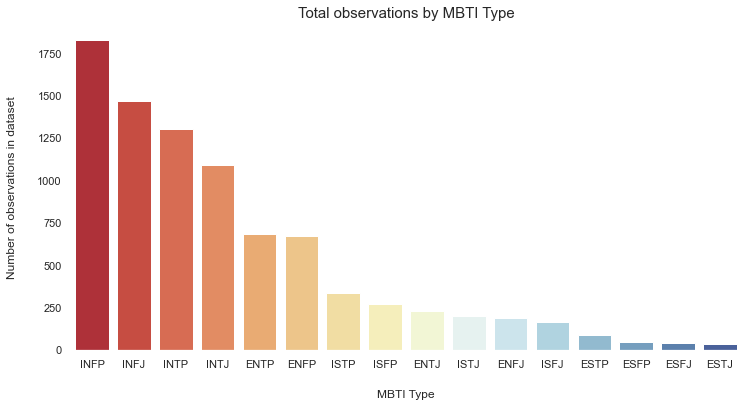

In [334]:
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=df_cat, order= df_cat['type'].value_counts().index, palette='RdYlBu')
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.title('Total observations by MBTI Type', size=15)
plt.savefig('Figures/countplot_types.png', dpi=300)

<br>

**We can see that there are quite a lot more cases of Intuition (N) than Sensing (S) and in the first category, Introversion (I) has more cases than Extraversion (E). Let's compare these numbers with an estimate of the global population according to the website 16Personalities**

In [48]:
# Let's first save the order of the previous visualization to avoid mismatching mbti types
sorter = df_cat['type'].value_counts().index.to_list()

In [49]:
# We import another dataset we created for this purpose
df_global = pd.read_csv('../../../data/16personalities.csv')

In [50]:
# Let's check how it looks like
df_global.head()

,code,percentage
0,enfj,0.074567
1,enfp,0.144600
2,entj,0.024050
3,entp,0.044300
4,esfj,0.090000


In [51]:
# We convert the code (which is the MBTI type) to uppercase letters
df_global['code'] = df_global['code'].apply(lambda x:x.upper())

In [52]:
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter,range(len(sorter))))

# Generate a rank column that will be used to sort the dataframe numerically
df_global['Rank'] = df_global['code'].map(sorterIndex)

# Sort the dataframe
df_global.sort_values('Rank', ascending = True, inplace = True)

In [53]:
# We can look at the new dataframe with the ranking column
df_global

,code,percentage,Rank
9,INFP,0.156667,0
8,INFJ,0.079200,1
11,INTP,0.055067,2
10,INTJ,0.031433,3
3,ENTP,0.044300,4
1,ENFP,0.144600,5
15,ISTP,0.020900,6
13,ISFP,0.054967,7
2,ENTJ,0.024050,8
14,ISTJ,0.031450,9


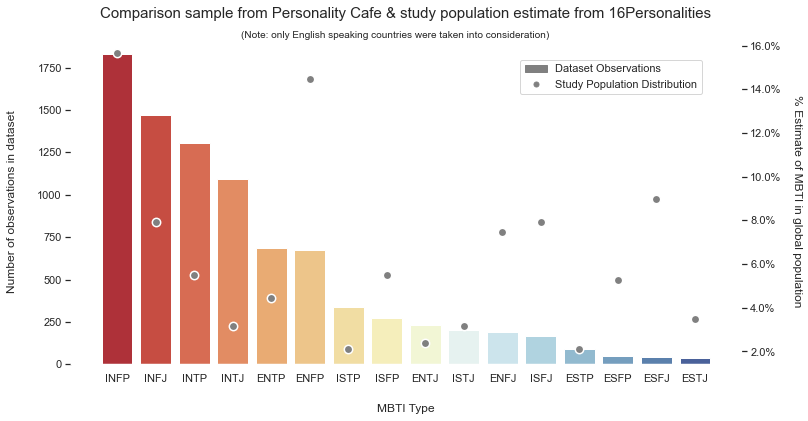

In [370]:
fig, ax = plt.subplots(figsize=(12,6))

# Countplot
sns.countplot(x='type', data=df_cat, order= df_cat['type'].value_counts().index, palette='RdYlBu', ax=ax)
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel('MBTI Type',labelpad=20)

# Scatterplot Data
x = df_global['code'].to_list()
y = np.array(df_global['percentage']*100)

# Scatterplot
ax2 = ax.twinx()
sns.scatterplot(x, y, ax=ax2,  s=70, facecolors='grey', edgecolors='b', linewidth=1.5)
ax2.set_xticklabels(x)
ax2.grid(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel('% Estimate of MBTI in global population', rotation=270, labelpad=20)

# Legend
bars = Patch(color='gray', label='Dataset Observations')
dots = matplotlib.lines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=5, label='Study Population Distribution')
plt.legend(handles=[bars, dots], loc='best', bbox_to_anchor=(0.45, 0.45, 0.5, 0.5))

plt.title('Comparison sample from Personality Cafe & study population estimate from 16Personalities',size=15,pad=20)
plt.figtext(.5,.88,'(Note: only English speaking countries were taken into consideration)',fontsize=10,ha='center')
plt.savefig('Figures/countplot_types_comparison_population.png', dpi=300)

plt.show()

<br>

**We can see there is quite a big difference between our data an the target population... this is something to consider later on**

**16 types are a lot, let's do the same for Keirsey's Temperaments and for the individual attributes**

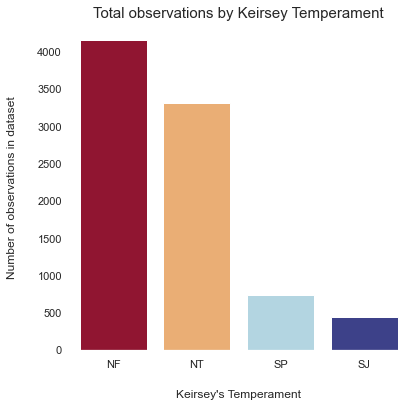

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='keirsey', data=df_cat, order= df_cat['keirsey'].value_counts().index, palette=colors_keirsey.values())
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel("Keirsey's Temperament",labelpad=20)
plt.title('Total observations by Keirsey Temperament', size=15)
plt.savefig('Figures/countplot_keirsey.png', dpi=300)

In [36]:
global_keirsey = []

for i in df_global['code']:
    if re.search(r'.NF.',i):
        global_keirsey.append('NF')

    elif re.search(r'.NT.',i):
        global_keirsey.append('NT')

    elif re.search(r'.S.P',i):
        global_keirsey.append('SP')

    else:
        global_keirsey.append('SJ')

In [37]:
df_global['keirsey'] = global_keirsey

In [38]:
df_global_keirsey = df_global.groupby('keirsey').sum()

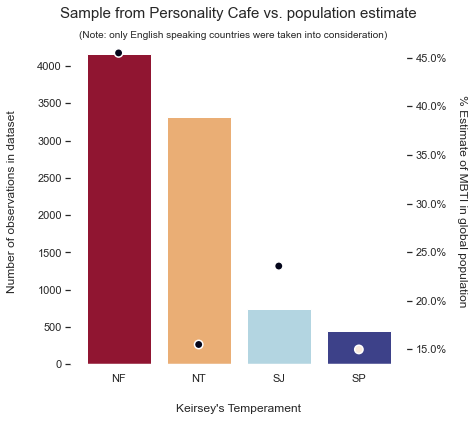

In [39]:
fig, ax = plt.subplots(figsize=(6,6))

# Countplot
sns.countplot(x='keirsey', data=df_cat, order= df_cat['keirsey'].value_counts().index, palette=colors_keirsey.values())
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel("Keirsey's Temperament",labelpad=20)

# Scatterplot Data
x = df_global_keirsey.index.to_list()
y = np.array(df_global_keirsey['percentage']*100)

# Scatterplot
ax2 = ax.twinx()
sns.scatterplot(x, y, ax=ax2,  s=70, facecolors='grey', edgecolors='b', linewidth=1.5)
ax2.set_xticklabels(x)
ax2.grid(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel('% Estimate of MBTI in global population', rotation=270, labelpad=20)

plt.title('Sample from Personality Cafe vs. population estimate',size=15,pad=20)
plt.figtext(.5,.88,'(Note: only English speaking countries were taken into consideration)',fontsize=10,ha='center')
plt.savefig('Figures/countplot_keirsey_comparison_population.png', dpi=300)

plt.show()

<br>

**Individual Attributes**

In [44]:
barplots_data = df.iloc[:,1:5].mean()

In [45]:
barplots_data

I    0.769568
J    0.395850
N    0.862017
T    0.458905
dtype: float64

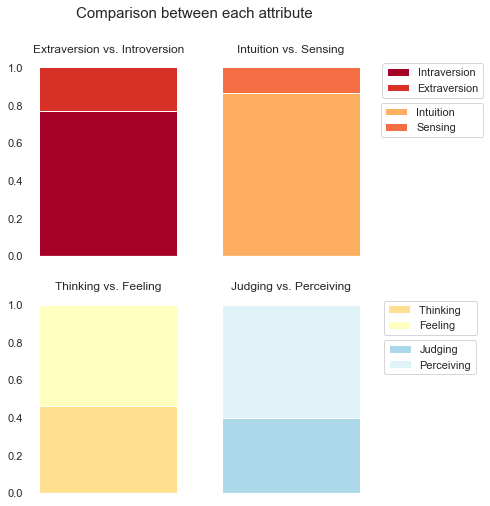

In [46]:
fig, ax = plt.subplots(2,2, figsize=(6,8))

ax[0,0].bar(0, height=barplots_data[0], color=colors_main['I'], edgecolor='white', width=0.4, label="Intraversion")
ax[0,0].bar(0, height=(1-barplots_data[0]), bottom=barplots_data[0], color=colors_main['E'], edgecolor='white', width=0.4, label="Extraversion")
ax[0,0].set_title('Extraversion vs. Introversion')
ax[0,0].legend(loc='best', bbox_to_anchor=(3,1), ncol=1)

ax[0,1].bar(0, height=barplots_data[2], color=colors_main['N'], edgecolor='white', width=0.4, label="Intuition        ")
ax[0,1].bar(0, height=(1-barplots_data[2]), bottom=barplots_data[2], color=colors_main['S'], edgecolor='white', width=0.4, label="Sensing")
ax[0,1].set_title('Intuition vs. Sensing')
ax[0,1].legend(loc='best', bbox_to_anchor=(1.80,0.8), ncol=1)

ax[1,0].bar(0, height=barplots_data[3], color=colors_main['T'], edgecolor='white', width=0.4, label="Thinking    ")
ax[1,0].bar(0, height=(1-barplots_data[3]), bottom=barplots_data[3], color=colors_main['F'], edgecolor='white', width=0.4, label="Feeling")
ax[1,0].set_title('Thinking vs. Feeling')
ax[1,0].xaxis.set_visible(False)
ax[1,0].legend(loc='best', bbox_to_anchor=(2.96,1), ncol=1)

ax[1,1].bar(0, height=barplots_data[1], color=colors_main['J'], edgecolor='white', width=0.4, label="Judging")
ax[1,1].bar(0, height=(1-barplots_data[1]), bottom=barplots_data[1], color=colors_main['P'], edgecolor='white', width=0.4, label="Perceiving")
ax[1,1].set_title('Judging vs. Perceiving')
ax[1,1].xaxis.set_visible(False)
ax[1,1].legend(loc='best', bbox_to_anchor=(1.75,0.8), ncol=1)

for ax in fig.get_axes():
    ax.label_outer()


plt.figtext(.5,0.95,'Comparison between each attribute',fontsize=15,ha='center')
#plt.savefig('Figures/percent_dataset_attributes.png', dpi=300)
plt.show()

In [54]:
df_dummies = df_global['code'].str.get_dummies('')
df_dummies = df_dummies.drop(['E','S','F','P'], axis=1)
df_global = df_global.join(df_dummies)

In [55]:
attributes = []

for a in ['I','J','N','T']:
    number = df_global.groupby(a).sum().iloc[1,0]
    attributes.append(number)

In [56]:
attributes

[0.5089333333333333,
 0.4448666666666667,
 0.6098833333333334,
 0.2633333333333333]

<ipython-input-57-f0a96560ece1>:48: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


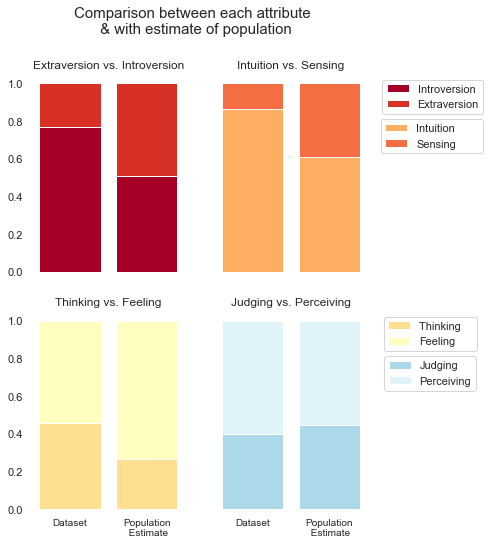

In [57]:
fig.canvas.draw()

fig, ax = plt.subplots(2,2, figsize=(6,8))

sns.despine(bottom=True, left=True)
x = np.arange(0,2)
x_ticks_labels = ['Dataset','Population\n Estimate']

fig.canvas.draw()

ax[0,0].bar(0, height=barplots_data[0], color=colors_main['I'], edgecolor='white', width=0.8, label="Introversion")
ax[0,0].bar(0, height=(1-barplots_data[0]), bottom=barplots_data[0], color=colors_main['E'], edgecolor='white', width=0.8, label="Extraversion")
ax[0,0].bar(1, height=attributes[0], color=colors_main['I'], edgecolor='white', width=0.8)
ax[0,0].bar(1, height=(1-attributes[0]), bottom=attributes[0], color=colors_main['E'], edgecolor='white', width=0.8)
ax[0,0].set_title('Extraversion vs. Introversion')
ax[0,0].legend(loc='best', bbox_to_anchor=(3,1), ncol=1)

ax[0,1].bar(0, height=barplots_data[2], color=colors_main['N'], edgecolor='white', width=0.8, label="Intuition        ")
ax[0,1].bar(0, height=(1-barplots_data[2]), bottom=barplots_data[2], color=colors_main['S'], edgecolor='white', width=0.8, label="Sensing")
ax[0,1].bar(1, height=attributes[2], color=colors_main['N'], edgecolor='white', width=0.8)
ax[0,1].bar(1, height=(1-attributes[2]), bottom=attributes[2], color=colors_main['S'], edgecolor='white', width=0.8)
ax[0,1].set_title('Intuition vs. Sensing')
ax[0,1].legend(loc='best', bbox_to_anchor=(1.80,0.8), ncol=1)

ax[1,0].bar(0, height=barplots_data[3], color=colors_main['T'], edgecolor='white', width=0.8, label="Thinking    ")
ax[1,0].bar(0, height=(1-barplots_data[3]), bottom=barplots_data[3], color=colors_main['F'], edgecolor='white', width=0.8, label="Feeling")
ax[1,0].bar(1, height=attributes[3], color=colors_main['T'], edgecolor='white', width=0.8)
ax[1,0].bar(1, height=(1-attributes[3]), bottom=attributes[3], color=colors_main['F'], edgecolor='white', width=0.8)
ax[1,0].set_title('Thinking vs. Feeling')
ax[1,0].legend(loc='best', bbox_to_anchor=(2.96,1), ncol=1)
ax[1,0].set_xticks(x) # Set number of ticks for x-axis
ax[1,0].set_xticklabels(x_ticks_labels, fontsize=10) # Set ticks labels for x-axis

ax[1,1].bar(0, height=barplots_data[1], color=colors_main['J'], edgecolor='white', width=0.8, label="Judging")
ax[1,1].bar(0, height=(1-barplots_data[1]), bottom=barplots_data[1], color=colors_main['P'], edgecolor='white', width=0.8, label="Perceiving")
ax[1,1].bar(1, height=attributes[1], color=colors_main['J'], edgecolor='white', width=0.8)
ax[1,1].bar(1, height=(1-attributes[1]), bottom=attributes[1], color=colors_main['P'], edgecolor='white', width=0.8)
ax[1,1].set_title('Judging vs. Perceiving')
ax[1,1].legend(loc='best', bbox_to_anchor=(1.75,0.8), ncol=1)
ax[1,1].set_xticks(x) # Set number of ticks for x-axis
ax[1,1].set_xticklabels(x_ticks_labels, fontsize=10) # Set ticks labels for x-axis

for ax in fig.get_axes():
    ax.label_outer()

plt.figtext(.5,0.95,'Comparison between each attribute \n & with estimate of population',fontsize=15,ha='center')

plt.tight_layout()
#plt.savefig('Figures/percent_dataset_attributes_population.png', dpi=300)
                   
plt.show()

<br>

### Heatmaps
***

In [141]:
df_heatmap = df.set_index('type')

In [142]:
df_heatmap = df_heatmap.drop('keirsey', axis=1)

In [143]:
# We standardize the columns 
df_norm_col=(df_heatmap-df_heatmap.mean())/df_heatmap.std()

In [377]:
# There are fields that really do not add a lot of value because they are clearly correlated with the target label, we will drop them to keep the range in place
drop = ['I','J','N','T','NT','NF','SP','SJ', 'ENFJ','ENFP','ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',  'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP','posts_len','XD_count',':D_count','xD_count',':(_count',':)_count',';)_count',';D_count', 'mentions_others','Total_Mentions','posts_len_Z_score']

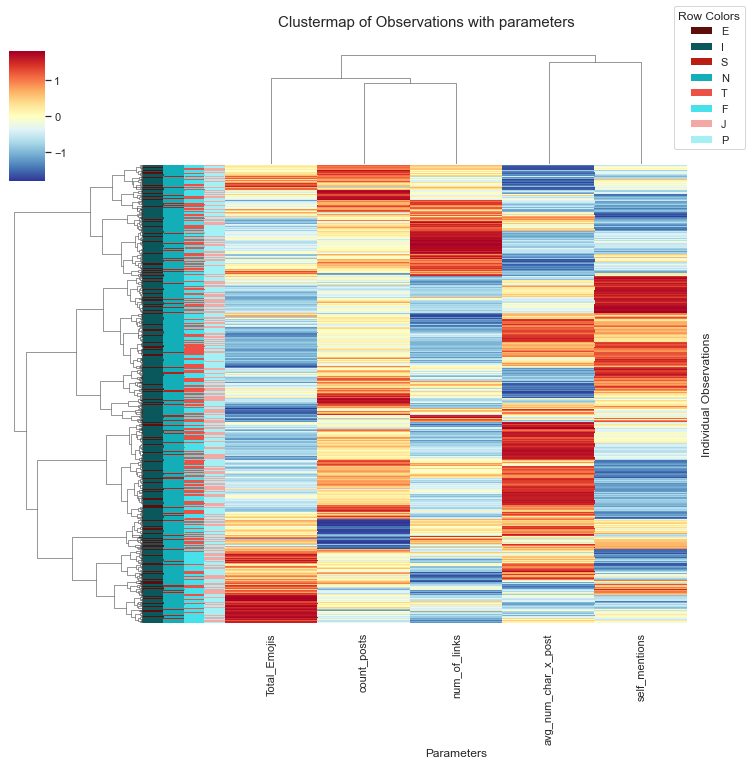

In [378]:
# Create row labels
labels = pd.Series(['I' if x == 1 else 'E' for x in df.I])
lut = dict(zip(set(labels), sns.hls_palette(2, l=0.2, s=0.8)))
row_colors = labels.map(lut)

labels2 = pd.Series(['N' if x == 1 else 'S' for x in df.N])
lut2 = dict(zip(set(labels2), sns.hls_palette(2, l=0.4, s=0.8)))
row_colors2 = labels2.map(lut2)

labels3 = pd.Series(['T' if x == 1 else 'F' for x in df['T']])
lut3 = dict(zip(set(labels3), sns.hls_palette(2, l=0.6, s=0.8)))
row_colors3 = labels3.map(lut3)

labels4 = pd.Series(['J' if x == 1 else 'P' for x in df.J])
lut4 = dict(zip(set(labels4), sns.hls_palette(2, l=0.8, s=0.8)))
row_colors4 = labels4.map(lut4)


# Creates the clustermap
g = sns.clustermap(df_norm_col.drop(drop, axis=1), method='ward', z_score=0, cmap='RdYlBu_r', 
                   figsize=(10,10), yticklabels=False, row_colors=[row_colors, row_colors2, row_colors3, row_colors4]) #robust=True,

# Title, Labels and Ticks
g.fig.suptitle('Clustermap of Observations with parameters', size=15, ha='center', y=1.03, x=0.6)
ax = g.ax_heatmap
ax.set_xlabel("Parameters")
ax.set_ylabel("Individual Observations", labelpad=15)

# Legend
z = {**lut,**lut2, **lut3,**lut4}
handles = [Patch(facecolor=z[name]) for name in z]
plt.legend(handles, z, title='Row Colors',
           bbox_to_anchor=(1.05, 1.05), bbox_transform=plt.gcf().transFigure, loc='best')

# Save figure
plt.savefig('Figures/Clustermap_individual_observations.png', dpi=300)
plt.show()

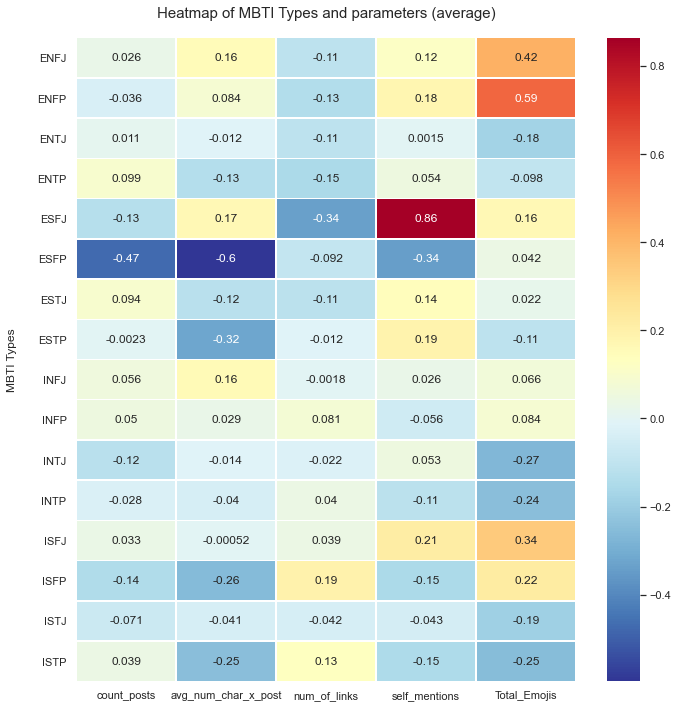

In [379]:
plt.figure(figsize=(10,10))
           
ax = sns.heatmap(df_norm_col.drop(drop, axis=1).groupby('type').mean(), cmap='RdYlBu_r', linewidths=0.5, annot=True)

plt.ylabel('MBTI Types', labelpad=20)
plt.yticks(rotation = 0)
plt.title('Heatmap of MBTI Types and parameters (average)', size=15, pad=20)

plt.tight_layout()
plt.savefig('Figures/Heatmap_target.png', dpi=300)

plt.show()

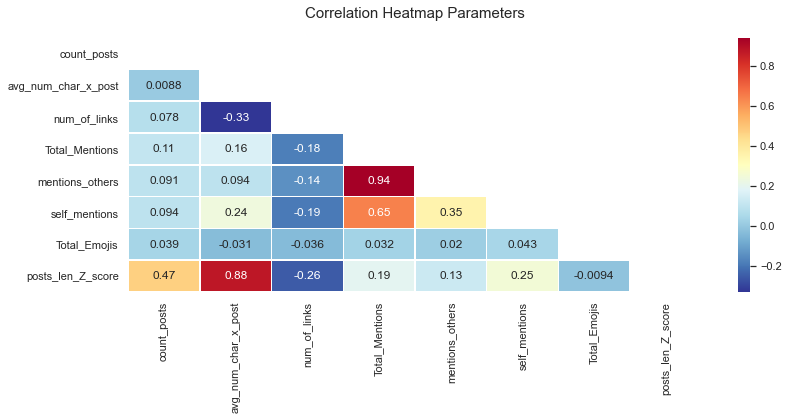

In [192]:
plt.figure(figsize=(12,6))

df_corr = df_heatmap.drop(drop,axis=1).corr()

mask = np.zeros(df_corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(df_corr, cmap='RdYlBu_r', mask = mask, linewidths=0.5, annot=True)

plt.title('Correlation Heatmap Parameters', size=15, pad=20)
plt.tight_layout()
plt.savefig('Figures/Heatmap.png', dpi=300)

plt.show()

<br>

### Posts_Count
***

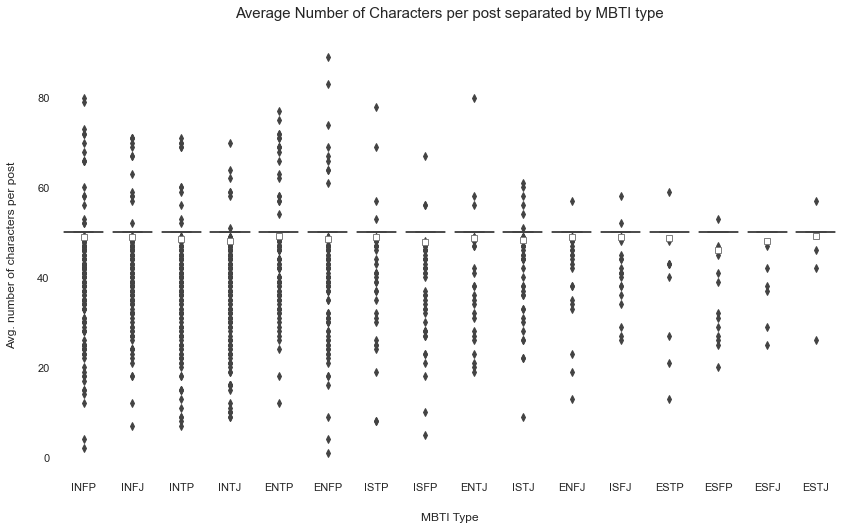

In [519]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='count_posts', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="avg_num_char_x_post", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Average Number of Characters per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. number of characters per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Characters_types.png', dpi=300)

plt.show()

Nothing relevant here, most of the observations have 50 posts

<br>

### Avg. Number of characters per post
***

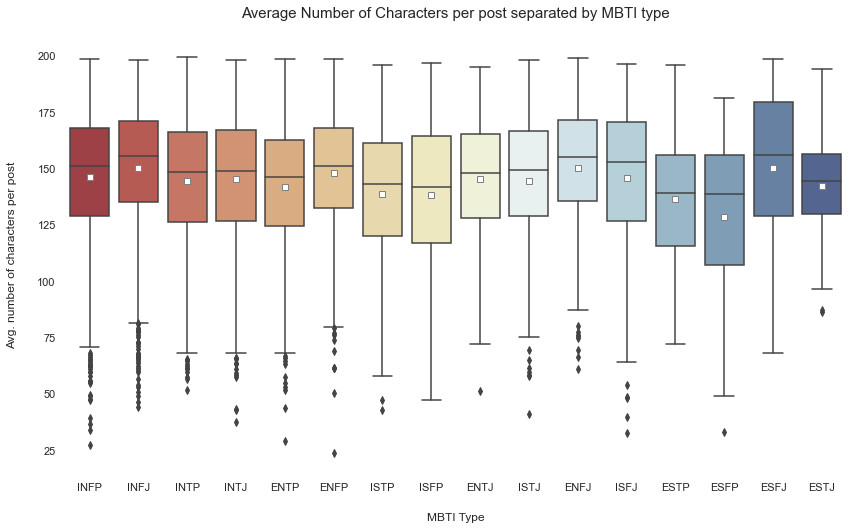

In [47]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_num_char_x_post', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="avg_num_char_x_post", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Average Number of Characters per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. number of characters per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Characters_types.png', dpi=300)

plt.show()

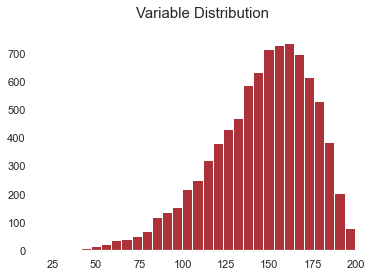

In [545]:
df.avg_num_char_x_post.hist(bins=30)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [539]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['avg_num_char_x_post']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 135.6341838645423
P-Value: 1.6673085613521744e-21
Reject NULL hypothesis - Significant differences exist between groups.


In [546]:
print(np.mean(df.avg_num_char_x_post))
print(np.std(df.avg_num_char_x_post))

145.46464059537522
28.866481389886747


In [544]:
for mtype in mbti_types:
    mean = np.mean(df[df['type'] == mtype]['avg_num_char_x_post'])
    std = np.std(df[df['type'] == mtype]['avg_num_char_x_post'])
    print(f'{mtype}: Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Mean = 149.98, Std = 29.18
ENFP: Mean = 147.89, Std = 26.87
ENTJ: Mean = 145.11, Std = 26.08
ENTP: Mean = 141.69, Std = 28.68
ESFJ: Mean = 150.27, Std = 33.55
ESFP: Mean = 128.24, Std = 36.66
ESTJ: Mean = 142.0, Std = 25.78
ESTP: Mean = 136.28, Std = 27.41
INFJ: Mean = 150.1, Std = 28.24
INFP: Mean = 146.31, Std = 28.98
INTJ: Mean = 145.05, Std = 28.35
INTP: Mean = 144.3, Std = 27.78
ISFJ: Mean = 145.45, Std = 33.37
ISFP: Mean = 138.06, Std = 31.99
ISTJ: Mean = 144.27, Std = 30.16
ISTP: Mean = 138.39, Std = 30.03


https://stats.stackexchange.com/questions/79289/why-is-statistically-significant-not-enough/79304#79304

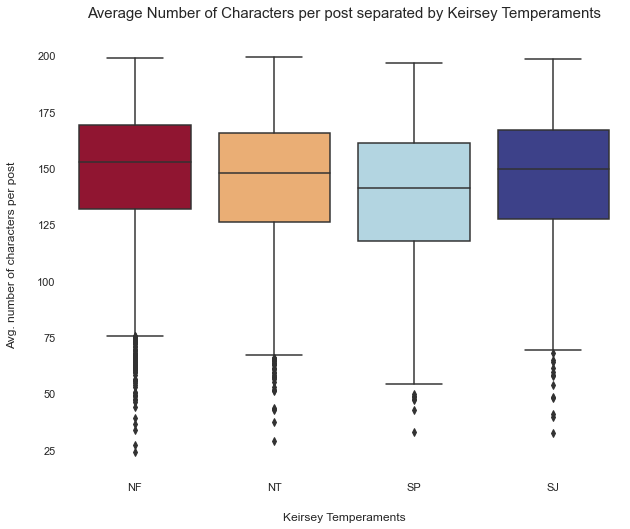

In [51]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette(list(colors_keirsey.values())))
sns.boxplot(x='keirsey',y='avg_num_char_x_post', data=df)
#sns.swarmplot(x='keirsey', y="avg_num_char_x_post", data=df, color='k', alpha=0.3)

plt.title('Average Number of Characters per post separated by Keirsey Temperaments', size=15, pad=20)
plt.xlabel('Keirsey Temperaments', labelpad=20)
plt.ylabel('Avg. number of characters per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Characters_Keirsey.png', dpi=300)

plt.show()

In [542]:
keirsey_temperaments = ['NF','NT','SJ','SP'] 

In [543]:
list_array = []

for kt in keirsey_temperaments:
    
    result = df[df['keirsey'] == kt]['avg_num_char_x_post']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 102.71748499706968
P-Value: 4.0468001260433343e-22
Reject NULL hypothesis - Significant differences exist between groups.


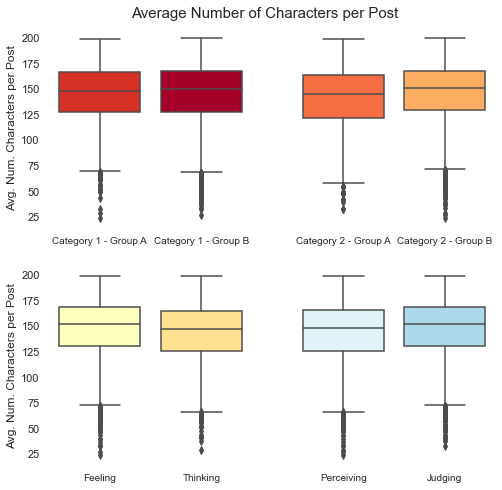

In [449]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

x = np.arange(0,2)
sns.despine(bottom=True, left=True)

ax1 = sns.boxplot(data=df, x='I',  y='avg_num_char_x_post', ax=ax[0,0])
ax[0,0].set_xticks(x) 
ax[0,0].set_xticklabels(['Category 1 - Group A', 'Category 1 - Group B'], fontsize=10)
ax[0,0].set(xlabel='', ylabel='Avg. Num. Characters per Post')
mybox1 = ax1.artists[0]
mybox1.set_facecolor(color=colors_main['E'])
mybox1 = ax1.artists[1]
mybox1.set_facecolor(color=colors_main['I'])

ax2 = sns.boxplot(data=df, x='N',  y='avg_num_char_x_post', ax=ax[0,1])
#ax2 = sns.swarmplot(data=df, x='N', y='avg_num_char_x_post', ax=ax[0,1])
ax[0,1].yaxis.set_visible(False)
ax[0,1].set_xticklabels(['Category 2 - Group A', 'Category 2 - Group B'], fontsize=10)
ax[0,1].set(xlabel='')
mybox2 = ax2.artists[0]
mybox2.set_facecolor(color=colors_main['S'])
mybox2 = ax2.artists[1]
mybox2.set_facecolor(color=colors_main['N'])

ax3 = sns.boxplot(data=df, x='T',  y='avg_num_char_x_post', ax=ax[1,0])
ax[1,0].set_xticklabels(['Feeling', 'Thinking'], fontsize=10)
ax[1,0].set(xlabel='', ylabel='Avg. Num. Characters per Post')
mybox3 = ax3.artists[0]
mybox3.set_facecolor(color=colors_main['F'])
mybox3 = ax3.artists[1]
mybox3.set_facecolor(color=colors_main['T'])

ax4 = sns.boxplot(data=df, x='J',  y='avg_num_char_x_post', ax=ax[1,1])
ax[1,1].yaxis.set_visible(False)
ax[1,1].set_xticklabels(['Perceiving', 'Judging'], fontsize=10)
ax[1,1].set(xlabel='')
mybox4 = ax4.artists[0]
mybox4.set_facecolor(color=colors_main['P'])
mybox4 = ax4.artists[1]
mybox4.set_facecolor(color=colors_main['J'])

plt.figtext(.5,0.90,'Average Number of Characters per Post',fontsize=15,ha='center')

plt.savefig('Figures/Boxplot_Avg_Char_Attributes.png', dpi=300)

plt.show()

In [450]:
df_num_char = df[['I','N','T','J','avg_num_char_x_post']]

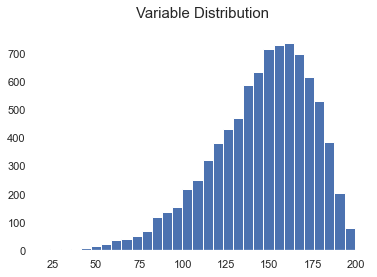

In [451]:
df_num_char.avg_num_char_x_post.hist(bins=30)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [476]:
x = df_num_char.avg_num_char_x_post

# Shapiro-Wilk normality test
stat, p = stats.shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)


In [525]:
df[df['type'] == 'ENTJ']['avg_num_char_x_post']

4       119.280000
22      143.140000
24      125.620000
39      182.780000
46      181.680000
           ...    
8449    114.729167
8517    149.350000
8607    175.180000
8612    101.842105
8618    173.480000
Name: avg_num_char_x_post, Length: 231, dtype: float64

In [529]:
list_array[0]

40      170.70
73      117.16
104     108.12
114     151.66
123     124.50
         ...  
8541     92.10
8555    101.94
8583    110.36
8628    177.04
8651    143.42
Name: avg_num_char_x_post, Length: 337, dtype: float64

In [406]:
I = df_num_char[df_num_char['I'] == 1][['I', 'avg_num_char_x_post']]
E = df_num_char[df_num_char['I'] == 0][['I', 'avg_num_char_x_post']]
N = df_num_char[df_num_char['N'] == 1][['N', 'avg_num_char_x_post']]
S = df_num_char[df_num_char['N'] == 0][['N', 'avg_num_char_x_post']]
T = df_num_char[df_num_char['T'] == 1][['T', 'avg_num_char_x_post']]
F = df_num_char[df_num_char['T'] == 0][['T', 'avg_num_char_x_post']]
J = df_num_char[df_num_char['J'] == 1][['J', 'avg_num_char_x_post']]
P = df_num_char[df_num_char['J'] == 0][['J', 'avg_num_char_x_post']]

In [465]:
mbti_dict = {'I':I,'E':E,'N':N,'S':S,'T':T,'F':F,'J':J,'P':P}

In [467]:
for k, v in mbti_dict.items():
    print(f'{k}: Count = {v.count()[0]}, Mean = {round(v.mean()[1],2)}, Std = {round(v.std()[1],2)}')

I: Count = 6676, Mean = 145.73, Std = 29.0
E: Count = 1999, Mean = 144.59, Std = 28.42
N: Count = 7478, Mean = 146.3, Std = 28.35
S: Count = 1197, Mean = 140.27, Std = 31.41
T: Count = 3981, Mean = 143.4, Std = 28.39
F: Count = 4694, Mean = 147.22, Std = 29.16
J: Count = 3434, Mean = 147.49, Std = 28.74
P: Count = 5241, Mean = 144.14, Std = 28.88


In [468]:
mbti_dict_p_values = {'IE':[I,E],'NS':[N,S],'TF':[T,F],'JP':[J,P]}

In [474]:
for k,v in mbti_dict_p_values.items():
    stat, p = stats.mannwhitneyu(v[0], v[1])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print(f'{k} result - Same distribution (fail to reject H0)')
    else:
        print(f'{k} result - Different distribution (reject H0)')
        
    print('---------------------------------------------')

Statistics=-25707067.000, p=0.000
IE result - Different distribution (reject H0)
---------------------------------------------
Statistics=-30421800.000, p=0.000
NS result - Different distribution (reject H0)
---------------------------------------------
Statistics=-12225390.000, p=0.000
TF result - Different distribution (reject H0)
---------------------------------------------
Statistics=-10627966.000, p=0.000
JP result - Different distribution (reject H0)
---------------------------------------------


<br>
<br>

### Number of Links

***

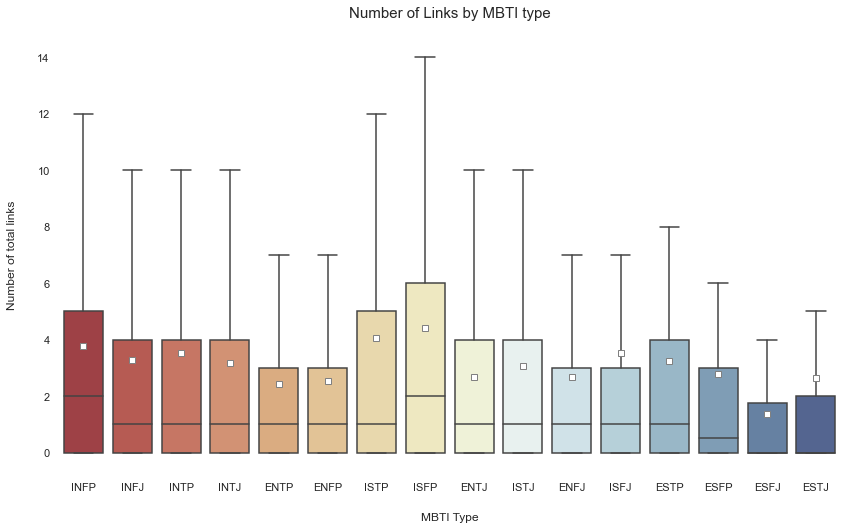

In [48]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='num_of_links', data=df, order=sorter, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="num_of_links", data=df_no_outliers, color='k', alpha=0.3, order=sorter)

plt.title('Number of Links by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of total links', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Links_types.png', dpi=300)

plt.show()

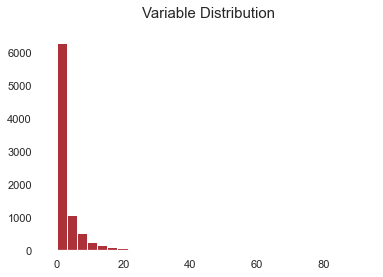

In [547]:
df.num_of_links.hist(bins=30)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [548]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['num_of_links']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 83.11686593674852
P-Value: 1.8718416032844887e-11
Reject NULL hypothesis - Significant differences exist between groups.


In [550]:
print(np.mean(df.num_of_links))
print(np.std(df.num_of_links))

3.304438040345821
5.792522051395371


In [551]:
for mtype in mbti_types:
    mean = np.mean(df[df['type'] == mtype]['num_of_links'])
    std = np.std(df[df['type'] == mtype]['num_of_links'])
    print(f'{mtype}: Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Mean = 2.66, Std = 5.06
ENFP: Mean = 2.52, Std = 4.34
ENTJ: Mean = 2.66, Std = 4.16
ENTP: Mean = 2.41, Std = 3.87
ESFJ: Mean = 1.36, Std = 2.31
ESFP: Mean = 2.77, Std = 5.41
ESTJ: Mean = 2.64, Std = 6.47
ESTP: Mean = 3.24, Std = 6.64
INFJ: Mean = 3.29, Std = 5.84
INFP: Mean = 3.77, Std = 6.03
INTJ: Mean = 3.18, Std = 6.07
INTP: Mean = 3.54, Std = 5.89
ISFJ: Mean = 3.53, Std = 7.23
ISFP: Mean = 4.42, Std = 7.21
ISTJ: Mean = 3.06, Std = 5.14
ISTP: Mean = 4.05, Std = 7.56


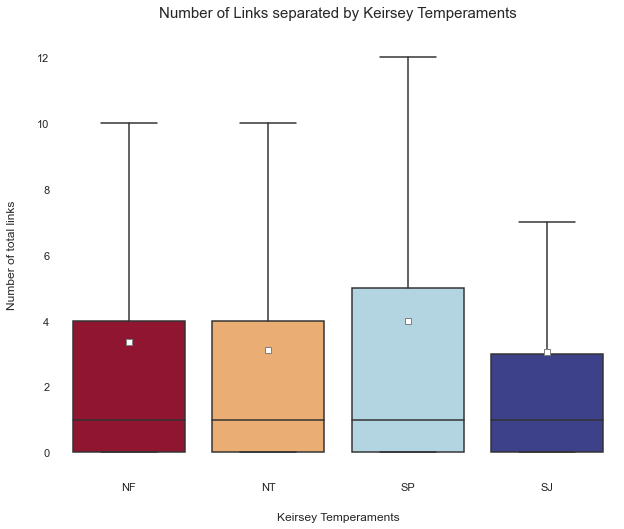

In [53]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette(list(colors_keirsey.values())))
sns.boxplot(x='keirsey',y='num_of_links', data=df, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='keirsey', y="num_of_links", data=df_no_outliers, color='k', alpha=0.3)

plt.title('Number of Links separated by Keirsey Temperaments', size=15, pad=20)
plt.xlabel('Keirsey Temperaments', labelpad=20)
plt.ylabel('Number of total links', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Links_Keirsey.png', dpi=300)

plt.show()

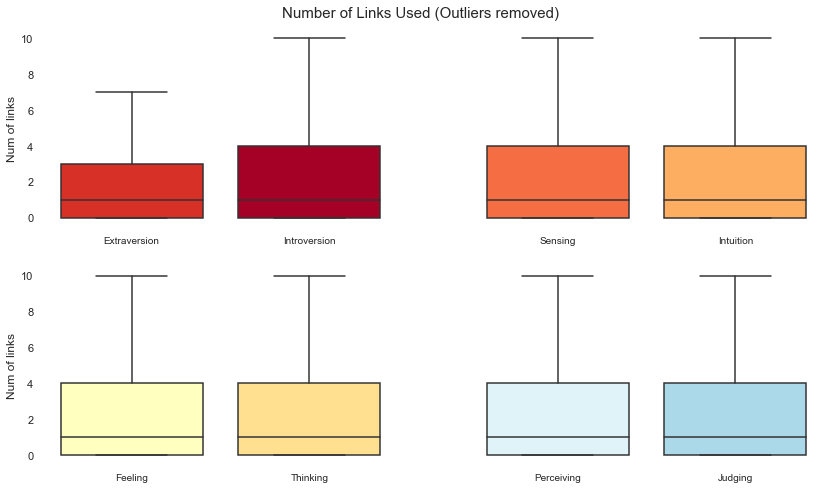

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

x = np.arange(0,2)
sns.despine(bottom=True, left=True)

ax1 = sns.boxplot(data=df, x='I',  y='num_of_links', showfliers=False, ax=ax[0,0], )
ax[0,0].set_xticks(x) 
ax[0,0].set_xticklabels(['Extraversion', 'Introversion'], fontsize=10)
ax[0,0].set(xlabel='', ylabel='Num of links')
mybox1 = ax1.artists[0]
mybox1.set_facecolor(color=colors_main['E'])
mybox1 = ax1.artists[1]
mybox1.set_facecolor(color=colors_main['I'])

ax2 = sns.boxplot(data=df, x='N',  y='num_of_links',showfliers=False, ax=ax[0,1])
ax[0,1].yaxis.set_visible(False)
ax[0,1].set_xticklabels(['Sensing', 'Intuition'], fontsize=10)
ax[0,1].set(xlabel='')
mybox2 = ax2.artists[0]
mybox2.set_facecolor(color=colors_main['S'])
mybox2 = ax2.artists[1]
mybox2.set_facecolor(color=colors_main['N'])

ax3 = sns.boxplot(data=df, x='T',  y='num_of_links', showfliers=False, ax=ax[1,0])
ax[1,0].set_xticklabels(['Feeling', 'Thinking'], fontsize=10)
ax[1,0].set(xlabel='', ylabel='Num of links')
mybox3 = ax3.artists[0]
mybox3.set_facecolor(color=colors_main['F'])
mybox3 = ax3.artists[1]
mybox3.set_facecolor(color=colors_main['T'])

ax4 = sns.boxplot(data=df, x='J',  y='num_of_links', showfliers=False, ax=ax[1,1])
ax[1,1].yaxis.set_visible(False)
ax[1,1].set_xticklabels(['Perceiving', 'Judging'], fontsize=10)
ax[1,1].set(xlabel='')
mybox4 = ax4.artists[0]
mybox4.set_facecolor(color=colors_main['P'])
mybox4 = ax4.artists[1]
mybox4.set_facecolor(color=colors_main['J'])

plt.figtext(.5,0.90,'Number of Links Used (Outliers removed)',fontsize=15,ha='center')

plt.savefig('Figures/Boxplot_Num_Links_Attributes.png', dpi=300)

plt.show()

<br>
<br>

### Use of emojis

***

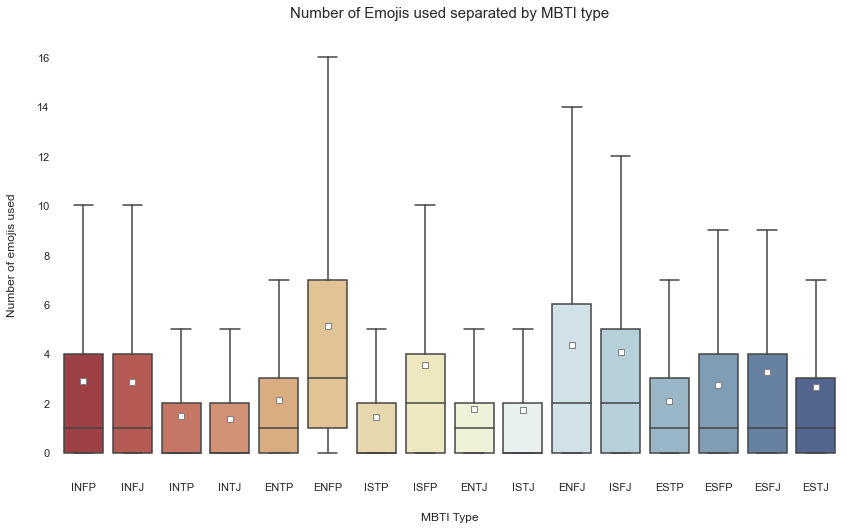

In [49]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='Total_Emojis', data=df, order=sorter, showmeans=True, showfliers=False,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="Total_Emojis", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Number of Emojis used separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of emojis used', labelpad=20)

plt.savefig('Figures/Boxplot_Use_Emojis_type.png', dpi=300)

plt.show()

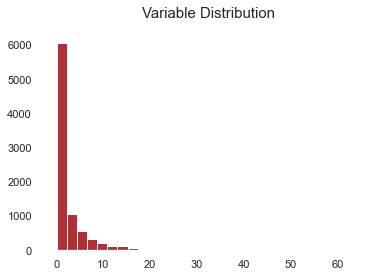

In [552]:
df.Total_Emojis.hist(bins=30)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [553]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['Total_Emojis']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 592.3664819198334
P-Value: 1.48548010596758e-116
Reject NULL hypothesis - Significant differences exist between groups.


In [554]:
print(np.mean(df.Total_Emojis))
print(np.std(df.Total_Emojis))

2.544207492795389
4.38624778334388


In [555]:
for mtype in mbti_types:
    mean = np.mean(df[df['type'] == mtype]['Total_Emojis'])
    std = np.std(df[df['type'] == mtype]['Total_Emojis'])
    print(f'{mtype}: Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Mean = 4.37, Std = 6.08
ENFP: Mean = 5.11, Std = 7.18
ENTJ: Mean = 1.76, Std = 3.02
ENTP: Mean = 2.12, Std = 3.48
ESFJ: Mean = 3.26, Std = 5.87
ESFP: Mean = 2.73, Std = 3.61
ESTJ: Mean = 2.64, Std = 3.99
ESTP: Mean = 2.08, Std = 3.42
INFJ: Mean = 2.83, Std = 4.17
INFP: Mean = 2.91, Std = 4.33
INTJ: Mean = 1.37, Std = 2.57
INTP: Mean = 1.47, Std = 3.31
ISFJ: Mean = 4.05, Std = 5.51
ISFP: Mean = 3.52, Std = 5.91
ISTJ: Mean = 1.73, Std = 3.4
ISTP: Mean = 1.45, Std = 2.87


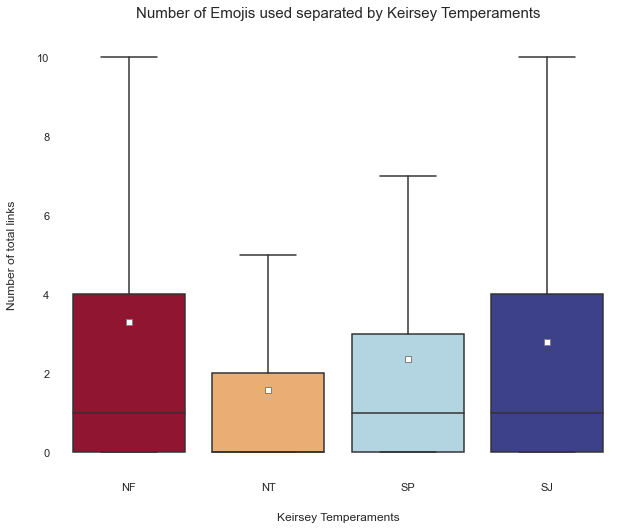

In [54]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette(list(colors_keirsey.values())))
sns.boxplot(x='keirsey',y='Total_Emojis', data=df, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='keirsey', y="Total_Emojis", data=df, color='k', alpha=0.3)

plt.title('Number of Emojis used separated by Keirsey Temperaments', size=15, pad=20)
plt.xlabel('Keirsey Temperaments', labelpad=20)
plt.ylabel('Number of total links', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Emojis_Keirsey.png', dpi=300)

plt.show()

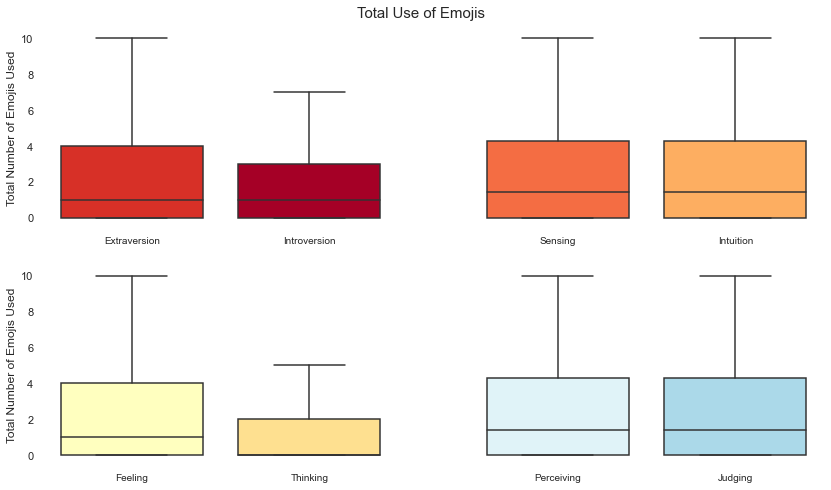

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

x = np.arange(0,2)
sns.despine(bottom=True, left=True)

ax1 = sns.boxplot(data=df, x='I',  y='Total_Emojis', showfliers=False, ax=ax[0,0])
ax[0,0].set_xticks(x) 
ax[0,0].set_xticklabels(['Extraversion', 'Introversion'], fontsize=10)
ax[0,0].set(xlabel='', ylabel='Total Number of Emojis Used')
mybox1 = ax1.artists[0]
mybox1.set_facecolor(color=colors_main['E'])
mybox1 = ax1.artists[1]
mybox1.set_facecolor(color=colors_main['I'])

ax2 = sns.boxplot(data=df, x='N',  y='Total_Emojis', showfliers=False,ax=ax[0,1])
ax[0,1].yaxis.set_visible(False)
ax[0,1].set_xticklabels(['Sensing', 'Intuition'], fontsize=10)
ax[0,1].set(xlabel='')
mybox2 = ax2.artists[0]
mybox2.set_facecolor(color=colors_main['S'])
mybox2 = ax2.artists[1]
mybox2.set_facecolor(color=colors_main['N'])

ax3 = sns.boxplot(data=df, x='T',  y='Total_Emojis', showfliers=False, ax=ax[1,0])
ax[1,0].set_xticklabels(['Feeling', 'Thinking'], fontsize=10)
ax[1,0].set(xlabel='', ylabel='Total Number of Emojis Used')
mybox3 = ax3.artists[0]
mybox3.set_facecolor(color=colors_main['F'])
mybox3 = ax3.artists[1]
mybox3.set_facecolor(color=colors_main['T'])

ax4 = sns.boxplot(data=df, x='J',  y='Total_Emojis', showfliers=False, ax=ax[1,1])
ax[1,1].yaxis.set_visible(False)
ax[1,1].set_xticklabels(['Perceiving', 'Judging'], fontsize=10)
ax[1,1].set(xlabel='')
mybox4 = ax4.artists[0]
mybox4.set_facecolor(color=colors_main['P'])
mybox4 = ax4.artists[1]
mybox4.set_facecolor(color=colors_main['J'])

plt.figtext(.5,0.90,'Total Use of Emojis',fontsize=15,ha='center')

plt.savefig('Figures/Boxplot_Total_Emojis_Attributes.png', dpi=300)

plt.show()

<br>
<br>

### Mentions

***

In [128]:
df_mentions = df[['type','self_mentions','mentions_others', 'Total_Mentions']]

In [130]:
df_mentions = df_mentions.groupby('type').sum()

In [139]:
df_mentions[['self_mentions','mentions_others']].divide(df_mentions.Total_Mentions)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,mentions_others,self_mentions
type,,,,,,,,,,,,,,,,,,
ENFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
totals = df.groupby('type').Total_Mentions.sum()div

In [67]:
df_mentions = df.iloc[:,13:29]
columns = df_mentions.columns.to_list()
df_mentions.columns = [re.sub(r'\_.*$','',s) for s in columns]
df_mentions = df_mentions.join(df['type'])
df_mentions = df_mentions.groupby('type').sum()
df_mentions.sort_index(axis=1, inplace=True)
names = df_mentions.columns

In [68]:
df_mentions.sum(axis=1)

type
ENFJ     3257
ENFP    11953
ENTJ     4051
ENTP    11698
ESFJ     1054
ESFP      864
ESTJ      741
ESTP     1896
INFJ    21607
INFP    23080
INTJ    15230
INTP    16531
ISFJ     2823
ISFP     4450
ISTJ     2714
ISTP     4003
dtype: int64

In [69]:
df_percentages = df_mentions.div(totals, axis=0)

In [70]:
df_percentages.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
type,,,,,,,,,,,,,,,,
ENFJ,0.352779,0.064784,0.030396,0.024255,0.027633,0.021492,0.015966,0.019343,0.101013,0.109917,0.067547,0.046976,0.018422,0.019036,0.042063,0.038379
ENFP,0.037313,0.356647,0.032460,0.060403,0.022839,0.028612,0.018238,0.022087,0.068351,0.080482,0.099808,0.038651,0.024011,0.025600,0.044926,0.039572
ENTJ,0.039250,0.055295,0.312762,0.060973,0.024438,0.027401,0.034806,0.029869,0.048383,0.062454,0.108615,0.071094,0.027647,0.034806,0.031103,0.031103
ENTP,0.024962,0.071978,0.043512,0.335527,0.027868,0.021371,0.020944,0.039836,0.079330,0.053941,0.078304,0.083775,0.032313,0.029321,0.030774,0.026244
ESFJ,0.035104,0.045541,0.019924,0.048387,0.380455,0.030361,0.030361,0.013283,0.038899,0.051233,0.052182,0.111954,0.046490,0.049336,0.024668,0.021822


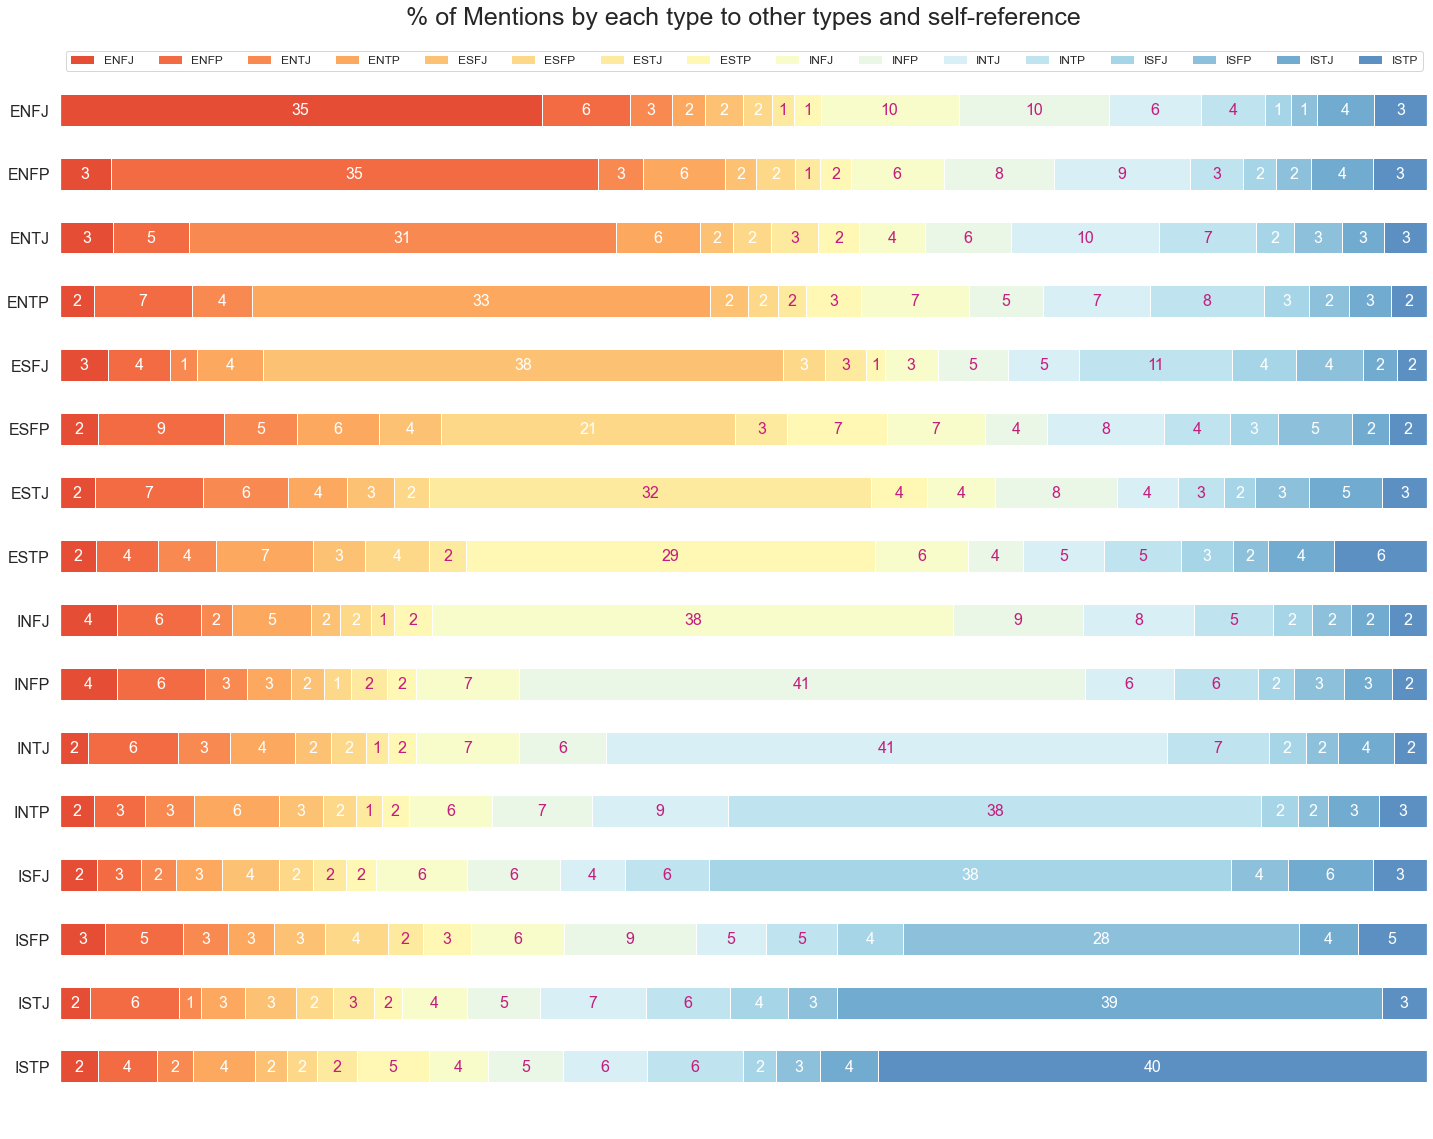

In [71]:
results = df_percentages.T.to_dict('list')
category_names = df_percentages.columns


labels = list(results.keys())
data = np.array(list(results.values()))
data = data*100
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlBu')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(24.5, 20))
ax.invert_yaxis()
ax.set_yticklabels(category_names,fontsize=16)
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else '#c41e7c'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), fontsize=16, ha='center', va='center',
                color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='upper left', fontsize='medium', facecolor=None)

plt.title('% of Mentions by each type to other types and self-reference', size=25, pad=20)

plt.show()
fig.savefig('Figures/mentions.png', dpi=300)

<br>
Seems interesting that the SPs have a lower self-metioning percentage in general, let's check this same data for Kersey's temperaments 

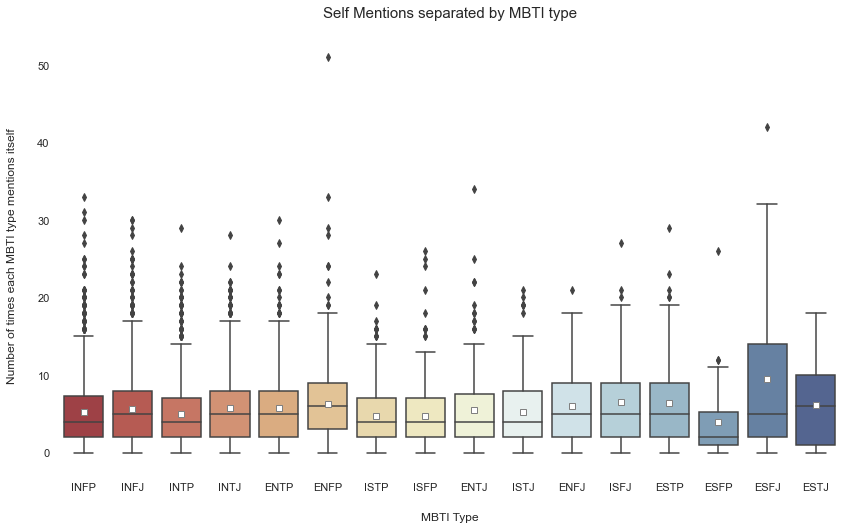

In [562]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='self_mentions', data=df, order=sorter, showmeans=True, showfliers=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="Total_Emojis", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Self Mentions separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of times each MBTI type mentions itself', labelpad=20)

plt.savefig('Figures/self_mentions_by_type.png', dpi=300)

plt.show()

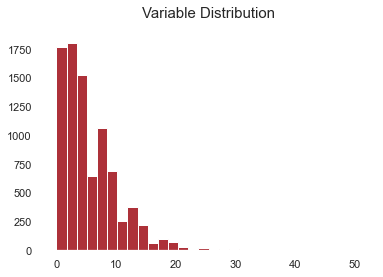

In [556]:
df.self_mentions.hist(bins=30)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [557]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['self_mentions']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 97.00434932573404
P-Value: 4.8090704472222525e-14
Reject NULL hypothesis - Significant differences exist between groups.


In [558]:
print(np.mean(df.self_mentions))
print(np.std(df.self_mentions))

5.477694524495678
4.710016720669916


In [559]:
for mtype in mbti_types:
    mean = np.mean(df[df['type'] == mtype]['self_mentions'])
    std = np.std(df[df['type'] == mtype]['self_mentions'])
    print(f'{mtype}: Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Mean = 6.05, Std = 4.83
ENFP: Mean = 6.32, Std = 4.92
ENTJ: Mean = 5.48, Std = 5.06
ENTP: Mean = 5.73, Std = 4.59
ESFJ: Mean = 9.55, Std = 10.33
ESFP: Mean = 3.88, Std = 4.76
ESTJ: Mean = 6.15, Std = 5.37
ESTP: Mean = 6.37, Std = 5.74
INFJ: Mean = 5.6, Std = 4.76
INFP: Mean = 5.21, Std = 4.53
INTJ: Mean = 5.73, Std = 4.71
INTP: Mean = 4.94, Std = 4.35
ISFJ: Mean = 6.49, Std = 5.29
ISFP: Mean = 4.75, Std = 4.36
ISTJ: Mean = 5.27, Std = 4.61
ISTP: Mean = 4.77, Std = 4.0


In [72]:
df_keirsey = df.groupby('keirsey').sum().iloc[:,12:28]

In [73]:
totals = df.groupby('keirsey').Total_Mentions.sum()

In [74]:
totals

keirsey
NF    59897
NT    47510
SJ     7332
SP    11213
Name: Total_Mentions, dtype: int64

In [75]:
df_keirsey_pct = df_keirsey.div(totals, axis=0)

In [76]:
df_keirsey_pct.sum(axis=1)

keirsey
NF    1.0
NT    1.0
SJ    1.0
SP    1.0
dtype: float64

In [77]:
new_column_names = ['NF', 'NT', 'NT', 'NT','NT', 'NF', 'NF', 'NF','SP', 'SP', 'SJ', 'SJ','SP', 'SP', 'SJ', 'SJ']

In [78]:
df_keirsey_pct.columns = new_column_names

In [79]:
df_keirsey_pct = df_keirsey_pct.groupby(lambda x:x, axis=1).sum()

In [80]:
plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.85, data.shape[1]))

array([[0.89888504, 0.30549789, 0.20676663, 1.        ],
       [0.95240292, 0.41806997, 0.25843906, 1.        ],
       [0.97208766, 0.53740869, 0.31349481, 1.        ],
       [0.98869666, 0.65736255, 0.36885813, 1.        ],
       [0.99361784, 0.75540177, 0.44905805, 1.        ],
       [0.99546328, 0.84767397, 0.53579393, 1.        ],
       [0.99730873, 0.91657055, 0.6225298 , 1.        ],
       [0.99915417, 0.97377932, 0.70926567, 1.        ],
       [0.97377932, 0.98985006, 0.79723183, 1.        ],
       [0.91657055, 0.96770473, 0.90242215, 1.        ],
       [0.84582853, 0.93694733, 0.9633218 , 1.        ],
       [0.74801999, 0.88896578, 0.93564014, 1.        ],
       [0.64944252, 0.83406382, 0.90449827, 1.        ],
       [0.5479431 , 0.75286428, 0.86020761, 1.        ],
       [0.44767397, 0.6698193 , 0.81514802, 1.        ],
       [0.3609381 , 0.56647443, 0.76163014, 1.        ]])

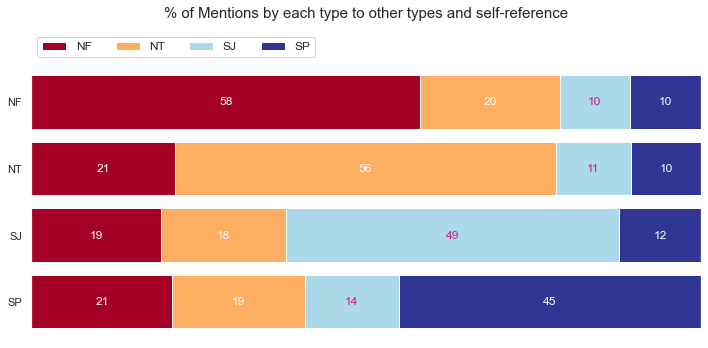

In [81]:
results = df_keirsey_pct.T.to_dict('list')
category_names = df_keirsey_pct.columns


labels = list(results.keys())
data = np.array(list(results.values()))
data = data*100
data_cum = data.cumsum(axis=1)
category_colors = colors_keirsey_rgb_pct.values() 

fig, ax = plt.subplots(figsize=(10, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.8,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else '#c41e7c'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center',
                color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium', facecolor='white')

plt.title('% of Mentions by each type to other types and self-reference', size=15, pad=45)
plt.tight_layout()

plt.show()
fig.savefig('Figures/keirsey_mentions.png', dpi=300)


Apparently the focus is more on the "NFs" and "NTs" rather than the "SPs" and "SJs"

show only the most mentioned types and order them by percentage (top 3), second chart, % of mentions about themselves
What percentage of the words they mention are types.
Go from general to specifics.

In [113]:
df_percentages
np.fill_diagonal(df_percentages.values,0)

In [114]:
df_plotly = df_percentages.reset_index()

In [115]:
df_plotly = pd.melt(df_plotly, id_vars=['type'])

In [116]:
df_plotly['value'] = df_plotly['value'].apply(lambda x:x*100)

In [117]:
colors_types_rgb

{'INFP': (173, 49, 57),
 'INFJ': (198, 77, 67),
 'INTP': (214, 108, 84),
 'INTJ': (226, 140, 100),
 'ENTP': (233, 171, 114),
 'ENFP': (238, 197, 138),
 'ISTP': (242, 221, 163),
 'ISFP': (245, 238, 186),
 'ENTJ': (242, 246, 212),
 'ISTJ': (230, 242, 240),
 'ENFJ': (204, 228, 236),
 'ISFJ': (176, 211, 223),
 'ESTP': (145, 186, 207),
 'ESFP': (118, 158, 190),
 'ESFJ': (92, 128, 172),
 'ESTJ': (74, 97, 154)}

In [91]:
types = list(df['type'].unique())

In [108]:
df_plotly['value']

0      0.000000
1      3.731281
2      3.924957
3      2.496153
4      3.510436
         ...   
251    3.514609
252    3.931987
253    5.056180
254    3.279293
255    0.000000
Name: value, Length: 256, dtype: float64

In [110]:
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs
init_notebook_mode(connected=True)         # initiate notebook for offline plot

In [112]:
for mbti in types:
    mbti_type = mbti
    df_mbti = test1[(test1['type'] == mbti_type) & test1['value'] != 0]
    fig = px.line_polar(df_mbti, r='value', theta='variable', line_close=True)


    fig.update_traces(fill='toself', 
                      line=dict(color='grey'),
                      fillcolor=('rgba'+str(colors_types_rgb[mbti_type])[:-1]+', 0.2)'))

    fig.update_layout(title={'text': mbti_type,'y':0.99,'x':0.5,'xanchor': 'center', 'yanchor': 'top'},
                     annotations=[dict(x=0.5, y=-0.25, showarrow=False, 
                                       text="% of times "+mbti_type+"'s were mentioned <br>by other MBTI types")])


    plotly.offline.plot(fig, filename='Figures/Plotly_Radar/'+mbti_type+'plot', 
                        image='png', auto_open=False, image_width=1280, image_height=800)
    plt.tight_layout()

    fig.show()



<Figure size 432x288 with 0 Axes>

## Inferential Statistics

In [478]:
df_count_posts = df[['I','N','T','J','count_posts']]

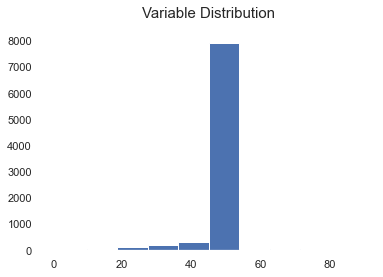

In [480]:
df_count_posts.count_posts.hist(bins=10)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [481]:
x = df_count_posts.count_posts

# Shapiro-Wilk normality test
stat, p = stats.shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.361, p=0.000
Sample does not look Gaussian (reject H0)


In [482]:
I = df_count_posts[df_count_posts['I'] == 1][['I', 'count_posts']]
E = df_count_posts[df_count_posts['I'] == 0][['I', 'count_posts']]
N = df_count_posts[df_count_posts['N'] == 1][['N', 'count_posts']]
S = df_count_posts[df_count_posts['N'] == 0][['N', 'count_posts']]
T = df_count_posts[df_count_posts['T'] == 1][['T', 'count_posts']]
F = df_count_posts[df_count_posts['T'] == 0][['T', 'count_posts']]
J = df_count_posts[df_count_posts['J'] == 1][['J', 'count_posts']]
P = df_count_posts[df_count_posts['J'] == 0][['J', 'count_posts']]

In [483]:
mbti_dict = {'I':I,'E':E,'N':N,'S':S,'T':T,'F':F,'J':J,'P':P}

In [484]:
for k, v in mbti_dict.items():
    print(f'{k}: Count = {v.count()[0]}, Mean = {round(v.mean()[1],2)}, Std = {round(v.std()[1],2)}')

I: Count = 6676, Mean = 48.72, Std = 5.39
E: Count = 1999, Mean = 48.82, Std = 5.74
N: Count = 7478, Mean = 48.79, Std = 5.42
S: Count = 1197, Mean = 48.47, Std = 5.83
T: Count = 3981, Mean = 48.61, Std = 5.82
F: Count = 4694, Mean = 48.85, Std = 5.16
J: Count = 3434, Mean = 48.66, Std = 5.36
P: Count = 5241, Mean = 48.8, Std = 5.55


In [485]:
for k,v in mbti_dict_p_values.items():
    stat, p = stats.mannwhitneyu(v[0], v[1])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print(f'{k} result - Same distribution (fail to reject H0)')
    else:
        print(f'{k} result - Different distribution (reject H0)')
        
    print('---------------------------------------------')

Statistics=-25707067.000, p=0.000
IE result - Different distribution (reject H0)
---------------------------------------------
Statistics=-30421800.000, p=0.000
NS result - Different distribution (reject H0)
---------------------------------------------
Statistics=-12225390.000, p=0.000
TF result - Different distribution (reject H0)
---------------------------------------------
Statistics=-10627966.000, p=0.000
JP result - Different distribution (reject H0)
---------------------------------------------


In [488]:
df_num_of_links = df[['I','N','T','J','num_of_links']]

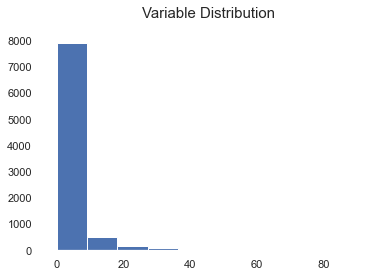

In [489]:
df_num_of_links.num_of_links.hist(bins=10)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [491]:
x = df_num_of_links.num_of_links

# Shapiro-Wilk normality test
stat, p = stats.shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.585, p=0.000
Sample does not look Gaussian (reject H0)


In [492]:
I = df_num_of_links[df_num_of_links['I'] == 1][['I', 'num_of_links']]
E = df_num_of_links[df_num_of_links['I'] == 0][['I', 'num_of_links']]
N = df_num_of_links[df_num_of_links['N'] == 1][['N', 'num_of_links']]
S = df_num_of_links[df_num_of_links['N'] == 0][['N', 'num_of_links']]
T = df_num_of_links[df_num_of_links['T'] == 1][['T', 'num_of_links']]
F = df_num_of_links[df_num_of_links['T'] == 0][['T', 'num_of_links']]
J = df_num_of_links[df_num_of_links['J'] == 1][['J', 'num_of_links']]
P = df_num_of_links[df_num_of_links['J'] == 0][['J', 'num_of_links']]

In [493]:
mbti_dict = {'I':I,'E':E,'N':N,'S':S,'T':T,'F':F,'J':J,'P':P}

In [494]:
for k, v in mbti_dict.items():
    print(f'{k}: Count = {v.count()[0]}, Mean = {round(v.mean()[1],2)}, Std = {round(v.std()[1],2)}')

I: Count = 6676, Mean = 3.54, Std = 6.12
E: Count = 1999, Mean = 2.53, Std = 4.43
N: Count = 7478, Mean = 3.25, Std = 5.61
S: Count = 1197, Mean = 3.64, Std = 6.8
T: Count = 3981, Mean = 3.2, Std = 5.73
F: Count = 4694, Mean = 3.39, Std = 5.84
J: Count = 3434, Mean = 3.15, Std = 5.8
P: Count = 5241, Mean = 3.41, Std = 5.79


In [495]:
for k,v in mbti_dict_p_values.items():
    stat, p = stats.mannwhitneyu(v[0], v[1])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print(f'{k} result - Same distribution (fail to reject H0)')
    else:
        print(f'{k} result - Different distribution (reject H0)')
        
    print('---------------------------------------------')

Statistics=-25707067.000, p=0.000
IE result - Different distribution (reject H0)
---------------------------------------------
Statistics=-30421800.000, p=0.000
NS result - Different distribution (reject H0)
---------------------------------------------
Statistics=-12225390.000, p=0.000
TF result - Different distribution (reject H0)
---------------------------------------------
Statistics=-10627966.000, p=0.000
JP result - Different distribution (reject H0)
---------------------------------------------


In [496]:
df_self_mentions = df[['I','N','T','J','self_mentions']]

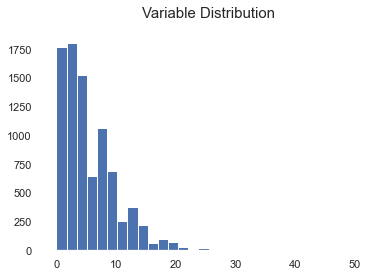

In [498]:
df_self_mentions.self_mentions.hist(bins=30)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [500]:
x = df_self_mentions.self_mentions

# Shapiro-Wilk normality test
stat, p = stats.shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.887, p=0.000
Sample does not look Gaussian (reject H0)


In [501]:
I = df_self_mentions[df_self_mentions['I'] == 1][['I', 'self_mentions']]
E = df_self_mentions[df_self_mentions['I'] == 0][['I', 'self_mentions']]
N = df_self_mentions[df_self_mentions['N'] == 1][['N', 'self_mentions']]
S = df_self_mentions[df_self_mentions['N'] == 0][['N', 'self_mentions']]
T = df_self_mentions[df_self_mentions['T'] == 1][['T', 'self_mentions']]
F = df_self_mentions[df_self_mentions['T'] == 0][['T', 'self_mentions']]
J = df_self_mentions[df_self_mentions['J'] == 1][['J', 'self_mentions']]
P = df_self_mentions[df_self_mentions['J'] == 0][['J', 'self_mentions']]

In [502]:
mbti_dict = {'I':I,'E':E,'N':N,'S':S,'T':T,'F':F,'J':J,'P':P}

In [503]:
for k, v in mbti_dict.items():
    print(f'{k}: Count = {v.count()[0]}, Mean = {round(v.mean()[1],2)}, Std = {round(v.std()[1],2)}')

I: Count = 6676, Mean = 5.32, Std = 4.58
E: Count = 1999, Mean = 6.0, Std = 5.09
N: Count = 7478, Mean = 5.49, Std = 4.65
S: Count = 1197, Mean = 5.39, Std = 5.05
T: Count = 3981, Mean = 5.37, Std = 4.58
F: Count = 4694, Mean = 5.57, Std = 4.81
J: Count = 3434, Mean = 5.73, Std = 4.92
P: Count = 5241, Mean = 5.31, Std = 4.56


In [504]:
for k,v in mbti_dict_p_values.items():
    stat, p = stats.mannwhitneyu(v[0], v[1])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print(f'{k} result - Same distribution (fail to reject H0)')
    else:
        print(f'{k} result - Different distribution (reject H0)')
        
    print('---------------------------------------------')

Statistics=-25707067.000, p=0.000
IE result - Different distribution (reject H0)
---------------------------------------------
Statistics=-30421800.000, p=0.000
NS result - Different distribution (reject H0)
---------------------------------------------
Statistics=-12225390.000, p=0.000
TF result - Different distribution (reject H0)
---------------------------------------------
Statistics=-10627966.000, p=0.000
JP result - Different distribution (reject H0)
---------------------------------------------


In [505]:
df_total_emojis = df[['I','N','T','J','Total_Emojis']]

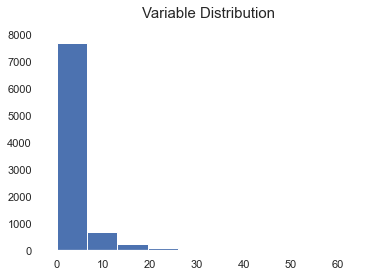

In [506]:
df_total_emojis.Total_Emojis.hist(bins=10)
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [508]:
x = df_total_emojis.Total_Emojis

# Shapiro-Wilk normality test
stat, p = stats.shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.607, p=0.000
Sample does not look Gaussian (reject H0)


In [510]:
I = df_total_emojis[df_total_emojis['I'] == 1][['I', 'Total_Emojis']]
E = df_total_emojis[df_total_emojis['I'] == 0][['I', 'Total_Emojis']]
N = df_total_emojis[df_total_emojis['N'] == 1][['N', 'Total_Emojis']]
S = df_total_emojis[df_total_emojis['N'] == 0][['N', 'Total_Emojis']]
T = df_total_emojis[df_total_emojis['T'] == 1][['T', 'Total_Emojis']]
F = df_total_emojis[df_total_emojis['T'] == 0][['T', 'Total_Emojis']]
J = df_total_emojis[df_total_emojis['J'] == 1][['J', 'Total_Emojis']]
P = df_total_emojis[df_total_emojis['J'] == 0][['J', 'Total_Emojis']]

In [511]:
mbti_dict = {'I':I,'E':E,'N':N,'S':S,'T':T,'F':F,'J':J,'P':P}

In [512]:
for k, v in mbti_dict.items():
    print(f'{k}: Count = {v.count()[0]}, Mean = {round(v.mean()[1],2)}, Std = {round(v.std()[1],2)}')

I: Count = 6676, Mean = 2.3, Std = 3.97
E: Count = 1999, Mean = 3.35, Std = 5.48
N: Count = 7478, Mean = 2.55, Std = 4.36
S: Count = 1197, Mean = 2.53, Std = 4.54
T: Count = 3981, Mean = 1.61, Std = 3.13
F: Count = 4694, Mean = 3.34, Std = 5.09
J: Count = 3434, Mean = 2.38, Std = 3.97
P: Count = 5241, Mean = 2.65, Std = 4.63


In [513]:
for k,v in mbti_dict_p_values.items():
    stat, p = stats.mannwhitneyu(v[0], v[1])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print(f'{k} result - Same distribution (fail to reject H0)')
    else:
        print(f'{k} result - Different distribution (reject H0)')
        
    print('---------------------------------------------')

Statistics=-25707067.000, p=0.000
IE result - Different distribution (reject H0)
---------------------------------------------
Statistics=-30421800.000, p=0.000
NS result - Different distribution (reject H0)
---------------------------------------------
Statistics=-12225390.000, p=0.000
TF result - Different distribution (reject H0)
---------------------------------------------
Statistics=-10627966.000, p=0.000
JP result - Different distribution (reject H0)
---------------------------------------------


In [56]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [57]:
for attribute in ['I','N','T', 'J']:
    a = df[attribute]
    b = df['avg_num_char_x_post']
    
    print(color.BOLD + 'Attribute '+ attribute +color.END)
    print(stats.pointbiserialr(a, b))
    print(stats.pearsonr(a, b))
    print(np.corrcoef(a, b))
    print('----------------------------')

Attribute I
PointbiserialrResult(correlation=0.016602325777696283, pvalue=0.12205167672677185)
(0.016602325777696283, 0.12205167672677185)
[[1.         0.01660233]
 [0.01660233 1.        ]]
----------------------------
Attribute N
PointbiserialrResult(correlation=0.07195529174482254, pvalue=1.951249265218757e-11)
(0.07195529174482254, 1.951249265218757e-11)
[[1.         0.07195529]
 [0.07195529 1.        ]]
----------------------------
Attribute T
PointbiserialrResult(correlation=-0.06586227524789745, pvalue=8.243085354563832e-10)
(-0.06586227524789745, 8.243085354563832e-10)
[[ 1.         -0.06586228]
 [-0.06586228  1.        ]]
----------------------------
Attribute J
PointbiserialrResult(correlation=0.056838663214642884, pvalue=1.1742805376462704e-07)
(0.056838663214642884, 1.1742805376462704e-07)
[[1.         0.05683866]
 [0.05683866 1.        ]]
----------------------------


In [59]:
for attribute in ['I','N','T', 'J']:
    a = df[attribute]
    b = df['num_of_links']
    
    print(color.BOLD + 'Attribute '+ attribute +color.END)
    print(stats.pointbiserialr(a, b))
    print(stats.pearsonr(a, b))
    print(np.corrcoef(a, b))
    print('----------------------------')

Attribute I
PointbiserialrResult(correlation=0.07318111891079167, pvalue=8.839511115173973e-12)
(0.07318111891079167, 8.839511115173973e-12)
[[1.         0.07318112]
 [0.07318112 1.        ]]
----------------------------
Attribute N
PointbiserialrResult(correlation=-0.02311479635767842, pvalue=0.03132794441092252)
(-0.02311479635767842, 0.03132794441092252)
[[ 1.        -0.0231148]
 [-0.0231148  1.       ]]
----------------------------
Attribute T
PointbiserialrResult(correlation=-0.01685171183795139, pvalue=0.11654351588492234)
(-0.01685171183795139, 0.11654351588492234)
[[ 1.         -0.01685171]
 [-0.01685171  1.        ]]
----------------------------
Attribute J
PointbiserialrResult(correlation=-0.022114486770938715, pvalue=0.0394280643094046)
(-0.022114486770938715, 0.0394280643094046)
[[ 1.         -0.02211449]
 [-0.02211449  1.        ]]
----------------------------


In [61]:
for attribute in ['I','N','T', 'J']:
    a = df[attribute]
    b = df['Total_Emojis']
    
    print(color.BOLD + 'Attribute '+ attribute +color.END)
    print(stats.pointbiserialr(a, b))
    print(stats.pearsonr(a, b))
    print(np.corrcoef(a, b))
    print('----------------------------')

Attribute I
PointbiserialrResult(correlation=-0.10023577692053277, pvalue=8.113869455196243e-21)
(-0.10023577692053277, 8.113869455196243e-21)
[[ 1.         -0.10023578]
 [-0.10023578  1.        ]]
----------------------------
Attribute N
PointbiserialrResult(correlation=0.0014795683986173743, pvalue=0.8904089607953617)
(0.0014795683986173743, 0.8904089607953617)
[[1.         0.00147957]
 [0.00147957 1.        ]]
----------------------------
Attribute T
PointbiserialrResult(correlation=-0.1969038476250931, pvalue=1.4649082130332285e-76)
(-0.1969038476250931, 1.4649082130332285e-76)
[[ 1.         -0.19690385]
 [-0.19690385  1.        ]]
----------------------------
Attribute J
PointbiserialrResult(correlation=-0.030890349178262867, pvalue=0.004009806354136205)
(-0.030890349178262867, 0.004009806354136205)
[[ 1.         -0.03089035]
 [-0.03089035  1.        ]]
----------------------------


In [438]:
NF = df[df['keirsey'] == 'NF'][['keirsey', 'avg_num_char_x_post']]
NT = df[df['keirsey'] == 'NT'][['keirsey', 'avg_num_char_x_post']]
SJ = df[df['keirsey'] == 'SJ'][['keirsey', 'avg_num_char_x_post']]
SP = df[df['keirsey'] == 'SP'][['keirsey', 'avg_num_char_x_post']]

In [444]:
NF.iloc[:,1]

0        90.100000
6       155.380000
8       103.560000
10      164.680000
11      106.930233
           ...    
8660    133.460000
8669    159.680000
8671    155.100000
8673    186.640000
8674    145.420000
Name: avg_num_char_x_post, Length: 4167, dtype: float64

In [445]:
stats.kruskal(NF.iloc[:,1], NT.iloc[:,1], SJ.iloc[:,1], SP.iloc[:,1])

KruskalResult(statistic=102.71748499706968, pvalue=4.0468001260433343e-22)

In [ ]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [.01, .05, .10, .50, .99]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=0.05, method='bonferroni')

# Print the resulting conclusions
print(pvals[0])

# Print the adjusted p-values themselves 
print(pvals[1])

In [153]:
# D’Agostino’s K^2 Test normality test

stat, p = stats.normaltest(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=652.839, p=0.000
Sample does not look Gaussian (reject H0)


In [154]:
# Anderson-Darling Test

# normality test
result = stats.anderson(x)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 74.101
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


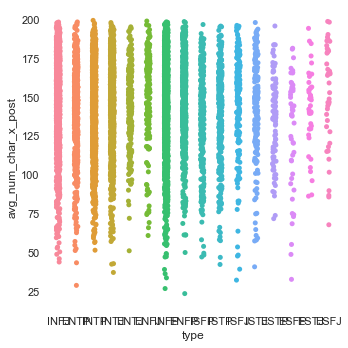

In [516]:
sns.catplot(x='type',y='avg_num_char_x_post', data=df)

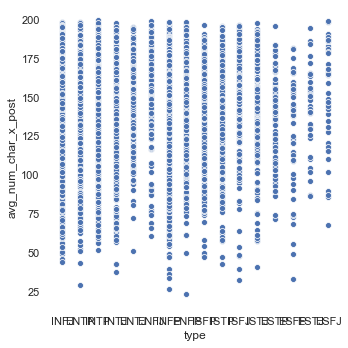

In [517]:
sns.relplot(x='type',y='avg_num_char_x_post', data=df)